# 1. 선형회귀

In [ ]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1999 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

# 2. NN 모듈을 사용한 선형회귀 구현

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

torch.manual_seed(1)

In [2]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

### nn.Linear() 는 파라미터 (가중치) 초깃값을 랜덤하게 지정. (seed 로 고정함)

In [3]:
model = nn.Linear(1, 1, bias = True)

print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [4]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

Epoch    0/2000 Error 13.103541
Epoch  100/2000 Error 0.002791
Epoch  200/2000 Error 0.001724
Epoch  300/2000 Error 0.001066
Epoch  400/2000 Error 0.000658
Epoch  500/2000 Error 0.000407
Epoch  600/2000 Error 0.000251
Epoch  700/2000 Error 0.000155
Epoch  800/2000 Error 0.000096
Epoch  900/2000 Error 0.000059
Epoch 1000/2000 Error 0.000037
Epoch 1100/2000 Error 0.000023
Epoch 1200/2000 Error 0.000014
Epoch 1300/2000 Error 0.000009
Epoch 1400/2000 Error 0.000005
Epoch 1500/2000 Error 0.000003
Epoch 1600/2000 Error 0.000002
Epoch 1700/2000 Error 0.000001
Epoch 1800/2000 Error 0.000001
Epoch 1900/2000 Error 0.000000
Epoch 2000/2000 Error 0.000000


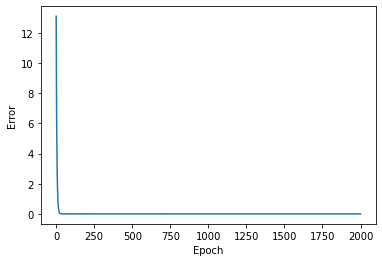

In [5]:
nb_epochs = 2000
error_list = []

for epoch in range(nb_epochs + 1):
    
    prediction = model(x_train)
    
    error = F.mse_loss(prediction, y_train)
    error_list.append(error.item()) # error.item() 은 텐서로 반환된 값을 일반적인 파이썬 숫자로 반환.
    
    optimizer.zero_grad() # gradient 0으로 초기화
    
    error.backward()
    
    optimizer.step() # update weight

    if epoch % 100 == 0 :
        print('Epoch {:4d}/{} Error {:.6f}'.format(
            epoch, nb_epochs, error.item()
        ))
    
plt.plot(error_list) 
plt.ylabel("Error")
plt.xlabel("Epoch")
plt.show()

In [6]:
# Model이 최적화 되었는지 테스트

new_var = torch.FloatTensor([[4.0]])

pred_y = model(new_var)

print(pred_y)

tensor([[7.9989]], grad_fn=<AddmmBackward0>)


In [7]:
# Parameters of after minimze

print(list(model.named_parameters()))

[('weight', Parameter containing:
tensor([[1.9994]], requires_grad=True)), ('bias', Parameter containing:
tensor([0.0014], requires_grad=True))]


# NN 모듈을 이용한 다중선형회귀 구현

In [95]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [96]:
model = nn.Linear(3, 1)

torch.manual_seed(1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


Epoch    0/2000 Error 31667.599609
Epoch  100/2000 Error 0.225993
Epoch  200/2000 Error 0.223911
Epoch  300/2000 Error 0.221941
Epoch  400/2000 Error 0.220059
Epoch  500/2000 Error 0.218271
Epoch  600/2000 Error 0.216575
Epoch  700/2000 Error 0.214950
Epoch  800/2000 Error 0.213413
Epoch  900/2000 Error 0.211952
Epoch 1000/2000 Error 0.210559
Epoch 1100/2000 Error 0.209230
Epoch 1200/2000 Error 0.207967
Epoch 1300/2000 Error 0.206762
Epoch 1400/2000 Error 0.205618
Epoch 1500/2000 Error 0.204529
Epoch 1600/2000 Error 0.203481
Epoch 1700/2000 Error 0.202486
Epoch 1800/2000 Error 0.201539
Epoch 1900/2000 Error 0.200634
Epoch 2000/2000 Error 0.199770


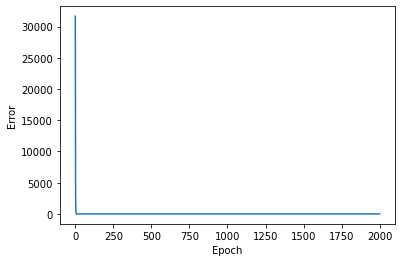

In [97]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.00001)
error_list = []

nb_epochs = 2000
for epoch in range(nb_epochs + 1) :
    
    prediction = model(x_train)
    
    error = F.mse_loss(prediction, y_train)
    error_list.append(error.item())
    
    optimizer.zero_grad()
    
    error.backward()
    
    optimizer.step()
    
    if epoch % 100 == 0 :
        print('Epoch {:4d}/{} Error {:.6f}'.format(
            epoch, nb_epochs, error.item()
        ))
    
plt.plot(error_list)
plt.ylabel("Error")
plt.xlabel("Epoch")
plt.show()

In [98]:
new_var = torch.FloatTensor([[70, 80, 90]])

pred_y = model(new_var)

print(pred_y)

tensor([[156.9489]], grad_fn=<AddmmBackward0>)


In [99]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.9778, 0.4539, 0.5768]], requires_grad=True), Parameter containing:
tensor([0.2802], requires_grad=True)]
